In [25]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

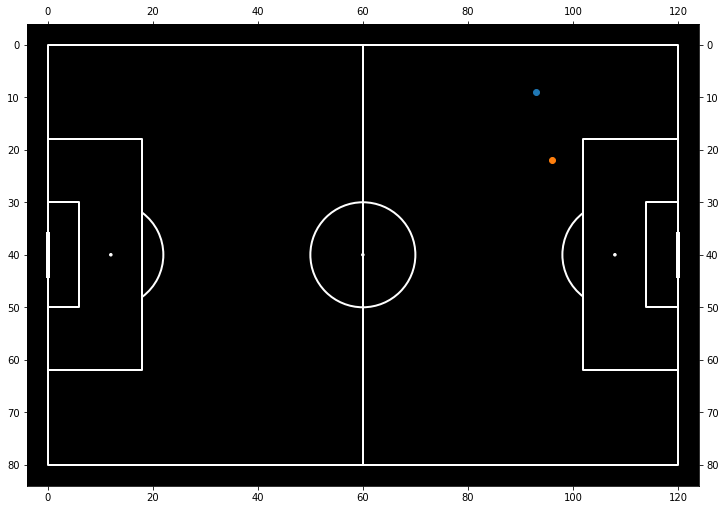

In [13]:
# plot pitch
fix, ax = plt.subplots(figsize=(13,8.5))
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color = 'black', line_color='white',
             constrained_layout=False, view='half', axis=True, label=True, tick=True)

pitch.draw(ax=ax)

# plot player positions (add to the lists below as well)
pitch.scatter(93,9,ax=ax)
pitch.scatter(96,22,ax=ax)
# ...

In [18]:
# plot the player's positions - create lists
barca_x = [93,96,99,102,104,95,86,79,89]
barca_y = [9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int)) # team id 

opp_x = [99,100,102,104,104,102,97,98,94,77]
opp_y = [14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int)) # team id 

# create dataframe com as listas
# df = pd.read_cav('voronoi.csv') # if we wanted to read from the csv instead
df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


In [22]:
# criar um array de pontos
points = np.column_stack((df.x,df.y))

points

array([[ 93,   9],
       [ 96,  22],
       [ 99,  33],
       [102,  44],
       [104,  56],
       [ 95,  63],
       [ 86,  52],
       [ 79,  33],
       [ 89,  22],
       [ 99,  14],
       [100,  22],
       [102,  33],
       [104,  43],
       [104,  46],
       [102,  55],
       [ 97,  37],
       [ 98,  27],
       [ 94,  21],
       [ 77,  45]], dtype=int64)

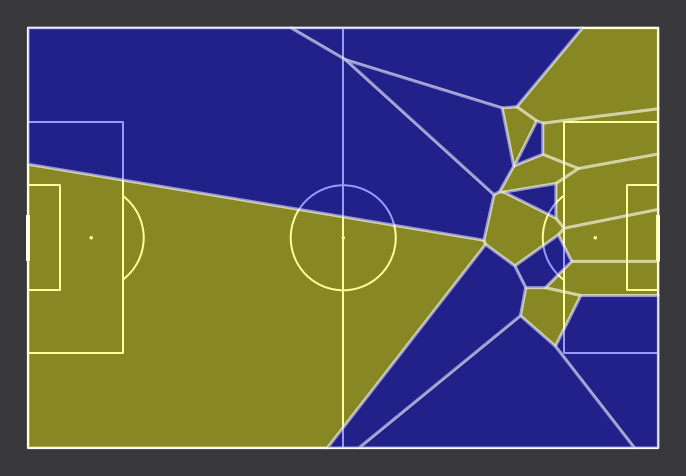

In [31]:
# create the actual pitch
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type='statsbomb', orientation='vertical', pitch_color = '#38383b', line_color='white',
             constrained_layout=False, view='half')

pitch.draw(ax=ax)

# criar variaveis para x, y e para cada uma das equipas
x = df.x
y = df.y
team1, team2 = pitch.voronoi(x,y,df.team)

# plot the diagram
t1 = pitch.polygon(team1,ax=ax,fc='yellow',ec='white',lw=3,alpha=.4)
t2 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)